# 配置环境

In [2]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple openai langchain langchain-openai langchain-chroma -q

^C


  error: subprocess-exited-with-error
  
  × Building wheel for chroma-hnswlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
      running bdist_wheel
      running build
      running build_ext
      building 'hnswlib' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for chroma-hnswlib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (chroma-hnswlib)


# 尝试通过Python和GPT进行单论对话

In [ ]:
from openai import OpenAI
import os

## 设置API
api_key = "sk-53b7201e936b457d8802a9f5ca3605b4"
base_url = "https://dashscope.aliyuncs.com/compatible-mode/v1"
os.environ["OPENAI_API_KEY"] = api_key


client = OpenAI(api_key=api_key, base_url=base_url)

In [ ]:
def chat_with_gpt(prompt):
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt},
        ],
        model="qwen-max",
    )
    return response.choices[0].message.content

In [ ]:
# 替换prompt的字符串，与GPT完成单次对话
prompt = "###### Who are you? ######"

response = chat_with_gpt(prompt)
print(response)

I am Qwen, a large language model created by Alibaba Cloud. I work as an AI assistant to help users with various tasks, such as answering questions, writing stories, composing emails, expressing opinions, answering questions, playing games, etc.


## 尝试多轮对话

In [ ]:
class Chat_with_mem:
    def __init__(self, client):
        self.client = client
        self.messages = [{"role": "system", "content": "You are a helpful assistant."}]

    def chat(self, prompt):
        self.messages.append({"role": "user", "content": prompt})
        response = self.client.chat.completions.create(
            messages=self.messages,
            model="qwen-max",
        )
        ### 维护对话历史，补全对话函数，GPT的角色role为'assistant' ###

        return response

    def clear_history(self):
        self.messages = [{"role": "system", "content": "You are a helpful assistant."}]

In [ ]:
# 启动交互式对话！
print(
    "Chat with GPT. Type 'exit' to end the conversation. Type 'clear' to refresh chat history"
)
chat_with_mem = Chat_with_mem(client)
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        break
    if user_input.lower() == "clear":
        chat_with_mem.clear_history()
        print("Chat history cleared.")
        continue
    response = chat_with_mem.chat(user_input)
    print(f"GPT: {response}")

Chat with GPT. Type 'exit' to end the conversation. Type 'clear' to refresh chat history
GPT: ChatCompletion(id='chatcmpl-9d14696c-e9cd-972e-9eca-e66cb41eef1f', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='我是Qwen，是阿里云开发的一款超大规模语言模型，我被设计用来帮助用户生成各种类型的文本，如文章、故事、诗歌、故事等，并能够根据不同的场景和需求提供有用的信息和帮助。无论是解答问题、提供建议还是参与创造性的思考，我都致力于以最自然、最流畅的方式与用户交流。', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1732188061, model='qwen-max', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=74, prompt_tokens=32, total_tokens=106, completion_tokens_details=None, prompt_tokens_details=None))
Chat history cleared.
GPT: ChatCompletion(id='chatcmpl-54c600f1-b157-96d3-bb88-d4c3a98d249a', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='我是Qwen，是阿里云开发的一款超大规模语言模型，我的目标是帮助用户更高效地获取信息、创作内容和娱乐。作为一个AI助手，我可以回答各种问题、提供信息、参与对话

## 引入新的第三方库，了解Langchain中的链条组件及LCEL表达式语法

In [ ]:
from langchain_openai import ChatOpenAI

# 声明一个Langchain中的大语言模型
llm = ChatOpenAI(api_key=api_key, base_url=base_url, model_name="qwen-max")

# Langchain链路中的各个组件都可以使用.invoke()方法调用
# 直接传入输入会发生什么？
llm.invoke("你好")

AIMessage(content='你好！有什么可以帮助你的吗？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 9, 'total_tokens': 16, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-58eef584-2d0f-4058-865a-87f08758fdc1-0', usage_metadata={'input_tokens': 9, 'output_tokens': 7, 'total_tokens': 16, 'input_token_details': {}, 'output_token_details': {}})

In [ ]:
# 我们观察到使用ChatOpenAI方法声明的模型已经内嵌了上一个小节中完成的对话格式实现
# 但其输出并不是直接可以使用的字符串格式

from langchain_core.output_parsers import StrOutputParser

# 先执行前者，结果传递给后者
chat_chain = llm | StrOutputParser()
chat_chain.invoke("正常的反义词是什么？")

'“正常”的反义词可以是“异常”或“不正常”。这两个词都用来描述不符合常规、标准或者预期状态的情况。根据具体的语境，选择使用哪一个可能更合适。例如，在医学报告中，我们可能会看到用“异常”来描述某些检查结果；而在日常对话中，人们可能会更常用“不正常”这个词。'

In [ ]:
# 利用LLM实现某种特定功能，但每次输入完整query十分繁琐

from langchain.prompts import PromptTemplate

# Template
# 例如："翻译：{query}"
# 在后续步骤中将'星期一'作为query输入，模板将变为："翻译：星期一"

test_template = "{query}的反义词是什么？"
test_prompt = PromptTemplate(template=test_template, input_variables=["query"])

test_chain = test_prompt | llm | StrOutputParser()
test_chain.invoke({"query": "正常"})

'“正常”的反义词可以是“异常”或“不正常”。这两个词都用来表示与常规、标准或预期状态不符的情况。根据具体的语境，选择使用哪一个可能更为合适。例如，在医学报告中更倾向于使用“异常”，而在日常对话中可能会更自然地使用“不正常”。'

# 来设计一个简单的翻译器吧！
使用刚刚学会的Langchain包装一个功能简单的翻译智能体Agent

## 功能

完成中英文互译

## 示例

### 输入
- 大语言模型是一种具有较大参数量级（通常为数亿甚至上千亿）的深度学习语言模型，其使用自监督学习或半监督学习对大量未标记文本进行训练从而完成对自然语言的建模。

- People lack willpower, rather than strength.

### 输出

- Large language models are a type of deep learning language model with a large number of parameters (usually in the billions or even trillions), which are trained on a large amount of unlabeled text using self-supervised learning or semi-supervised learning to model natural language.

- 人们往往缺乏毅力，而非实力。



In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import PromptTemplate

llm = ChatOpenAI(api_key=api_key, base_url=base_url, model_name="qwen-max")


###  设计一个prompt
# 设计能指示LLM完成中英文互译的提示词，完成translator_template，{*}形式在langchain的template对象中作为占位符替换使用

translator_template = "设想你是一位优秀的中英文翻译官，请协助我完成中英文互译！"
translator_prompt = PromptTemplate(
    template=translator_template, input_variables=["query"]
)


# 参考刚刚学习的内容，书写LCEL表达式构建最简单的智能体链条
translator_chain = test_prompt | llm | StrOutputParser()

# 试试你的Agent
query_input = "大语言模型是一种具有较大参数量级（通常为数亿甚至上千亿）的深度学习语言模型，其使用自监督学习或半监督学习对大量未标记文本进行训练从而完成对自然语言的建模。"
query_input = "People lack willpower, rather than strength."
result = translator_chain.invoke({"query": query_input})
print(result)

这句话“People lack willpower, rather than strength.”的意思是人们缺乏的是意志力，而不是体力。其反义可以表达为人们并不缺乏意志力，他们缺少的是体力。用英语可以这样表述：“People lack strength, rather than willpower.”

这样就改变了原句的重点，从强调缺乏意志力转变成了强调缺乏体力。


# 利⽤LLM，从头开始构建⼀个医疗报告⽣成机器人！
## 报告内容
`结构化的报告信息`、`对诊疗过程的总结概要`、`诊疗中出现的疾病、药物等专业概念的相关信息`

<br>

## Agent 1 结构化信息抽取助手
利用LLM基于对话抽取其中的结构化医学信息

<br>

## Agent 2 诊疗总结助手
利用LLM总结对话中呈现的诊疗过程

<br>

## Agent 3 参考资料查询助手
基于诊疗过程中涉及的专业知识概念生成检索问题，在知识库中检索相关信息作为参考资料

## *结构化信息抽取助手*
### 输入
```plain tex
患者：宝宝6个月，从昨天开始就清鼻涕，前天从晚上11点吃了奶粉以后，到第二...
医生：宝贝现在精神状态怎么样？咳嗽，发烧，拉肚子不
患者：精神还好，肚子还涨
  ... ...
```
### 输出
```json
{
                "主诉": "流涕2天",
                "现病史": "患儿出现流涕2天，清水样鼻涕，量多，伴腹胀，大便3天1次，无咳嗽、发热，食欲较差。",
                "辅助检查": "无",
                "既往史": "无",
                "诊断": "上呼吸道感染",
                "建议": "口服感冒药和健脾开胃药调节，鼻涕多口服伪麻美芬滴剂，用生理海水喷雾剂喷鼻腔缓解鼻塞。"
}
```

In [ ]:
import json

with open("samples.json", "r", encoding="utf-8") as f:
    samples = json.load(f)

**处理对话字符串**

In [15]:
def trans_dial(dialogue):
    text = ""
    for round in dialogue:
        if round["role"] == "医生":
            text += "医生："
        else:
            text += "患者："
        text += round["content"]
        text += "\n"
    return text

**设计调试Prompt**

In [22]:
from langchain_core.output_parsers import StrOutputParser, JsonOutputParser

# 按照要求设计prompt，对话占位符使用{dialogue}
structured_extract_template_str = """ 设想你是一位专业且乐于助人的医生，请根据我提出的医疗相关问题给出医疗报告，报告需要输出如下格式的结构化信息：
                "主诉":,
                "现病史":,
                "辅助检查":,
                "既往史":,
                "诊断":,
                "建议":"""

structured_extract_template = PromptTemplate(
    input_variables = ["dialogue"]
    template=structured_extract_template_str,
    verbose=True
)


structured_extract_chain = structured_extract_template | llm | StrOutputParser()

dialogue_text = trans_dial(samples["test_sample"]["dialogue"])

structured = structured_extract_chain.invoke({"dialogue": dialogue_text})
print(structured)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (791661390.py, line 13)

**试试Few-shot**（可选）

In [ ]:
# 按照你所希望的输出格式定义一个格式化函数，将结构化信息转换为可输入模型的字符串
def trans_few_shot_output(report):
    pass


# 补全以下代码
def get_few_shot_text(samples):
    text = ""
    for i, item in enumerate(samples):
        text += f"样例{i+1}：\n"
        # 补全代码，附加样例对话记录及输出结果
    return text


get_few_shot_text(samples["few_shot_sample"])

'样例1\n医生：你好，很高兴为您服务。\n医生：为了更好的提供服务，我需要询问您几个与病症相关的问题，感谢您配合。\n患者：好的\n医生：现在咳嗽还重吗？\n患者：现在孩子说有痰咳不出来，\n医生：检查过吗？用的什么药治疗？\n医生：是输液治疗的吗？\n患者：是的！检查病菌和病毒，之前三天用的是阿奇，和止咳化痰的！后四天用的是头炮和痰热清\n医生：查肺炎支原体抗体了吗？\n患者：那没有\n医生：血常规查了吗？\n医生：拍胸片了吗？\n患者：查了，说俩种病毒都感染了\n患者：没有，\n患者：去年得过一回，这些检查都做了，用的也是头炮和止咳化痰的\n医生：如果用药效果不好的话，建议去医院与临床医生沟通查肺炎支原体抗体，看看是不是肺炎支原体感染\n患者：如果要是肺炎支原体感染的话，那应该用什么药呢\n医生：支原体感染好的慢，要按疗程用药，用阿奇霉素这一类的药\n患者：好的谢谢\n医生：要在临床医生的指导下用药\n患者：好的\n医生：诊断明确，治疗效果才好，孩子才能早日康复\n报告：\n{\n    "主诉": "咳嗽。",\n    "现病史": "患者出现咳嗽，伴咳痰，去医院行血常规检查提示病毒感染，口服阿奇霉素、止咳化痰的药物、头孢和痰热清等药物治疗。",\n    "辅助检查": "血常规-病毒感染。",\n    "既往史": "无。",\n    "诊断": "支气管炎。",\n    "建议": "医院就诊查支原体抗体，若肺炎支原体感染，采用阿奇霉素这一类的药治疗。"\n}\n\n样例2\n医生：你好\n患者：您好\n医生：请问宝宝多大了？\n患者：11个月了\n医生：症状出现多久了？\n患者：3天了，宝宝不发烧，精神也挺好，就是流鼻涕，鼻塞，今天孩伴有咳嗽\n医生：流的是清鼻涕吗？\n患者：开始鼻涕很黏，今天流清鼻涕了\n医生：咳嗽时有痰音吗？\n患者：有\n医生：化验血了吗？\n患者：没有，第一个医生听了听就叫打针\n患者：说打一周\n医生：那后来这个医生开了什么药？\n患者：鲜竹沥和复方福尔可定口服溶液，还有一种药粉，没名\n医生：孩子病程比较短，症状也不太严重，可以先口服这些药物，三天看有没有效果。\n患者：后边这个医生说在严重的话过去他再给调药\n医生：是的\n患者：只要不发烧，先吃这些药就行是吧，\n医生：是\n患者：谢谢\n报告：\n{\n  

In [23]:
# 在zero-shot promplt的基础上修改得到few-shot模板，few_shot样例占位符使用{few_shot}
fewshot_structured_extract_template_str = """ """

fewshot_structured_extract_template = PromptTemplate(
    input_variables=["few_shot", "dialogue"],
    template=fewshot_structured_extract_template_str,
    verbose=True,
)


fewshot_structured_extract_chain = (
    fewshot_structured_extract_template | llm | JsonOutputParser()
)

few_shot_text = get_few_shot_text(samples["few_shot_sample"])
dialogue_text = trans_dial(samples["test_sample"]["dialogue"])

structured = fewshot_structured_extract_chain.invoke(
    {"few_shot": few_shot_text, "dialogue": dialogue_text}
)
print(structured)

NameError: name 'get_few_shot_text' is not defined

## *诊疗总结助手*
### 输入
```plain tex
患者：宝宝6个月，从昨天开始就清鼻涕，前天从晚上11点吃了奶粉以后，到第二...
医生：宝贝现在精神状态怎么样？咳嗽，发烧，拉肚子不
患者：精神还好，肚子还涨
  ... ...
```
### 输出
```plain text
6个月大的宝宝从前天开始出现食欲减退的症状，前天晚上11点后到第二天早上9点未进食奶粉，昨天晚上9点后至今再次出现不进食的情况。
同时，宝宝开始流鼻涕，但精神状态尚可，没有发热和咳嗽的症状，大便次数为每三天一次，显得有些便秘。鼻涕较多但无颜色。
医生初步判断宝宝可能是感冒引起的食欲不振。医生建议可以给宝宝服用感冒药和健脾开胃药作为调节。具体药物方案为伪麻美芬滴剂以缓解鼻涕过多的症状，同时用生理海水喷雾剂来缓解鼻塞，结合健脾开胃药以调节食欲。
```

**设计调试prompt**

In [ ]:
# 按照要求设计prompt，对话占位符使用{dialogue}
summary_template_str = """ """

summary_template = PromptTemplate(
    input_variables=["dialogue"], template=summary_template_str
)


summary_chain = summary_template | llm | StrOutputParser()

summary = summary_chain.invoke({"dialogue": dialogue_text})
print(summary)

您好！看起来您的消息可能没有发送完整。您需要帮助解决什么问题或讨论什么话题呢？请告诉我更多的细节，我会尽力提供帮助。


## *参考资料查询助手*

### 输入
```plain tex
患者：宝宝6个月，从昨天开始就清鼻涕，前天从晚上11点吃了奶粉以后，到第二...
医生：宝贝现在精神状态怎么样？咳嗽，发烧，拉肚子不
患者：精神还好，肚子还涨
  ... ...
```
### 输出

#### 子任务一：
生成检索语句
```plain text
1. 什么是感冒？
2. 什么是健脾开胃药？
3. 伪麻美芬滴剂是什么药物？
```
#### 子任务二：
检索得到参考文档
```plain text
'普通感冒是一种累及鼻和咽喉的疾病。大多数情况下，它是无害的，但可能感觉不是这样。称为病毒的病菌可引起普通感冒。\n通常，成人每年可能会患两到三次感冒。婴幼儿可能会更频繁地感冒。\n大多数人患普通感冒后会在 7 天至 10 天内痊愈。吸烟者的症状可能会持续更久。大多数情况下，普通感冒无需医疗护理。如果症状没有好转或恶化，联系医务人员。\n由病菌引起的鼻和咽喉疾病称为上呼吸道感染。对于儿童。大多数儿童普通感冒不需要联系医务人员。'
'健脾，中医名词，指健运脾气的一种治法。适用于脾气虚弱，运化无力所致的脘腹胀满、大便溏泄、食欲不振、肢倦乏力等症。常用方药如参苓白术散．香砂六君子汤等。\n健脾，也是补法之一。亦称补脾、益脾。治疗脾虚、运化功能减弱的方法。用于面色萎黄、疲倦乏力、少气懒言、食欲不振、食后腹胀、大便溏薄，舌淡苔白，脉缓弱等脾气虚弱证候。常用药如党参、莲子、白术、茯苓、山药、薏苡仁等。方如参苓白术散。'
'伪麻美沙芬滴剂是专对无发热症状的婴幼儿感冒而配制的，无严重胃肠刺激过敏反应及其他严重副作用。本复方中盐酸伪麻黄碱为拟肾上腺素药可收缩鼻粘膜血管减轻鼻塞症状；氢溴酸右美沙芬为镇咳药通过抑制延髓咳嗽中枢而产生镇咳作用。']
```

**生成检索语句**

利用LLM基于诊疗对话生成涉及疾病、药物、症状等专业信息的检索句。

由于仅准备了少量演示样本，建议限定生成句子数量不大于三句、问题保持简单直接，可查看`context.json`文件中的参考文档情况

<br>
*新知识*

使用`RunnableLambda`包装自定义函数，并将其加入到Chain链条中

In [27]:
# 按照要求设计prompt，对话占位符使用{dialogue}
query_template_str = """ 1. 什么是感冒？"""

query_template = PromptTemplate(
    input_variables=["dialogue"], template=query_template_str
)

query_chain = query_template | llm | StrOutputParser()

query = query_chain.invoke({"dialogue": dialogue_text})
print(query)

感冒是一种常见的呼吸道疾病，通常由多种不同的病毒引起，其中最常见的是鼻病毒。感冒主要影响鼻子和喉咙，但有时也可能影响到肺部或耳朵。其典型症状包括打喷嚏、喉咙痛、鼻塞或流鼻涕、轻微的身体疼痛以及可能的低烧。大多数情况下，感冒的症状会在一周左右自行缓解，不需要特别的治疗。然而，充分休息、多喝水和使用一些对症治疗的方法（如退热药）可以帮助缓解不适感。如果症状严重或者持续时间很长，则应该咨询医生以获得进一步的帮助。


In [26]:
from langchain_core.runnables import RunnableLambda


# 定义一个函数从大模型输出中分离不同的请求，返回一个字符串列表
def split_query(text):
    pass


# 串联检索句生成流程，自定义函数可使用RunnableLambda包装并加入LCEL链路中
split_query_chain = query_chain | RunnableLambda(split_query)

query_list = split_query_chain.invoke({"dialogue": dialogue_text})
print(query_list)

None


**检索器**

利用已封装好的`Chroma`和`OpenAIEmbeddings`搭建一个向量检索器！

检索器是什么？

使用向量表示参考文档 → 使用向量表示查询请求 → 找到最相似的一个

<br>

- 什么是向量检索?

向量检索是一种基于向量相似度计算的数据检索方法。它通过将文本、图像、声音等数据形式转化为向量空间中的向量，在向量空间中搜寻表示向量相似的对象完成匹配检索。在搜索引擎等中应用广泛。

- 下面的代码都干了些什么？

我们使用一个简单的OpenAIEmebeddings API服务去直接请求参考文本对应的表示向量，并把得到的结果都存在了Chroma这个向量库里，当我有一个想要检索的输入，就再向OpenAIEmebeddings API请求该输入的表示向量，在已经构建好的Chroma向量库的找到最相似的对象并返回结果。


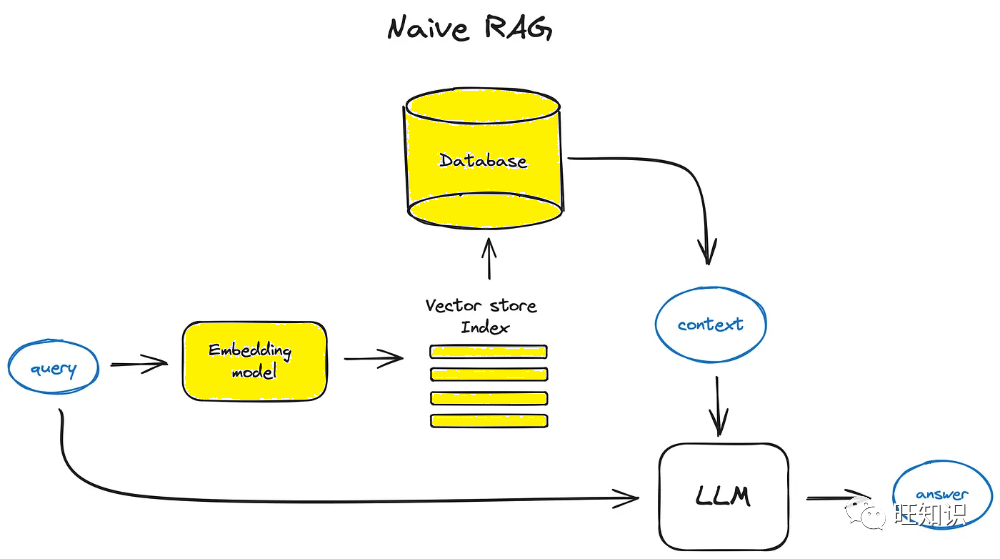

In [32]:
from langchain_core.documents import Document

with open("samples.json", "r", encoding="utf-8") as f:
    context = json.load(f)

# print(context)
documents = [Document(page_content=item["context"]) for item in context]

TypeError: string indices must be integers, not 'str'

In [33]:
# 若参考文档为txt形式，一行为一个条目
with open("context.txt") as f:
    context_lines = f.readlines()

# 试想如何得到如上的documents？
documents = 

SyntaxError: invalid syntax (61317764.py, line 6)

*构建检索器*

In [34]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(
    documents=documents, embedding=OpenAIEmbeddings(api_key=api_key, base_url=base_url)
)

ModuleNotFoundError: No module named 'langchain_chroma'

In [182]:
## 实例化一个只检索第一个结果的向量检索器
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 1})

In [ ]:
# 测试检索器，检索结果的字符串参考如下代码读取
retrieved_docs = retriever.invoke("感冒怎么办？")
print(retrieved_docs[0].page_content)

*编写一个批量检索函数，并将整个参考资料查询助手流程串联起来*

In [183]:
# 编写一个批量检索函数，接收一个query列表，返回一个有序的检索结果（字符串）列表
def retrieve_batch(queries):
    results = []
    return 0

In [184]:
#  得到检索句→分割检索句→批量检索，书写LCEL表达式完成个参考资料查询助手流程
#  注意使用RunnableLambda包装自定义函数
full_retrieve_chain = 

retrieved_results = full_retrieve_chain.invoke({"dialogue": dialogue_text})
print(retrieved_results)

['普通感冒是一种累及鼻和咽喉的疾病。大多数情况下，它是无害的，但可能感觉不是这样。称为病毒的病菌可引起普通感冒。\n通常，成人每年可能会患两到三次感冒。婴幼儿可能会更频繁地感冒。\n大多数人患普通感冒后会在 7 天至 10 天内痊愈。吸烟者的症状可能会持续更久。大多数情况下，普通感冒无需医疗护理。如果症状没有好转或恶化，联系医务人员。\n由病菌引起的鼻和咽喉疾病称为上呼吸道感染。对于儿童。大多数儿童普通感冒不需要联系医务人员。如果孩子出现以下任一情况，请立即就诊：', '健脾，中医名词，指健运脾气的一种治法。适用于脾气虚弱，运化无力所致的脘腹胀满、大便溏泄、食欲不振、肢倦乏力等症。常用方药如参苓白术散．香砂六君子汤等。\n健脾，也是补法之一。亦称补脾、益脾。治疗脾虚、运化功能减弱的方法。用于面色萎黄、疲倦乏力、少气懒言、食欲不振、食后腹胀、大便溏薄，舌淡苔白，脉缓弱等脾气虚弱证候。常用药如党参、莲子、白术、茯苓、山药、薏苡仁等。方如参苓白术散。', '伪麻美沙芬滴剂是专对无发热症状的婴幼儿感冒而配制的，无严重胃肠刺激过敏反应及其他严重副作用。本复方中盐酸伪麻黄碱为拟肾上腺素药可收缩鼻粘膜血管减轻鼻塞症状；氢溴酸右美沙芬为镇咳药通过抑制延髓咳嗽中枢而产生镇咳作用。']


# 串联前述步骤构建的所有助手Agent，合体成为医疗报告生成助手机器人吧！

In [192]:
#### 所需的所有输入变量
#  samples: 输入样本
#  few_shot_text: 格式化的few_shot样例 （optional）
#  dialogue_text: 格式化的测试样本对话
#  retriever: 检索器

## 将三个助手Agent的链路表达式复制重新声明一次
chain1 = 
chain2 = 
chain3 = 

# 报告模板
report_template = """
# 结构化记录

{structured_report}

# 诊疗总结

{summary}

# 相关资料

{retrieved_results}
"""

# 编写函数，将三个助手的最终输出整合至报告模板中。   列表等可使用markdown语法(optional)
# 传入参数为一个字典，包含三个助手的输出，字段参考下方调用，分别为structured_report, summary, retrieved_results
def merge_report(_dict):

    return report

full_chain = RunnableLambda(merge_report)
report = full_chain.invoke({
    "structured_report": chain1.invoke({"few_shot": few_shot_text, "dialogue": dialogue_text}),
    # "structured_report": chain1.invoke({"dialogue": dialogue_text}),
    "summary": chain2.invoke({"dialogue": dialogue_text}),
    "retrieved_results": chain3.invoke({"dialogue": dialogue_text})
})

In [127]:
# 展示报告
from IPython.display import display, Markdown

display(Markdown(report))


# 结构化记录

- 主诉: 宝宝6个月，清鼻涕。
- 现病史: 患儿6个月，从昨天开始出现清鼻涕，前天晚上至第二天早上未进食，昨天晚上至今天不进食。精神状态良好，大便3天一次，能喝水但不多，未放屁。鼻涕无颜色，多量。无咳嗽、发烧。
- 辅助检查: 无。
- 既往史: 不详。
- 诊断: 感冒。
- 建议: 口服伪麻美芬滴剂，配合健脾开胃药调节，使用生理海水喷雾剂缓解鼻塞。观察病情变化。


# 诊疗总结

医生根据患儿的症状询问了病史，并得出宝宝患有感冒的结论。建议患者可以给宝宝吃感冒药和健脾开胃药来调节，同时还建议使用伪麻美芬滴剂和生理海水喷雾剂来缓解鼻塞。通过诊疗过程，医生对宝宝的病情有了初步的了解，并给出了相应的治疗建议。

# 相关资料

- 普通感冒是一种累及鼻和咽喉的疾病。大多数情况下，它是无害的，但可能感觉不是这样。称为病毒的病菌可引起普通感冒。
通常，成人每年可能会患两到三次感冒。婴幼儿可能会更频繁地感冒。
大多数人患普通感冒后会在 7 天至 10 天内痊愈。吸烟者的症状可能会持续更久。大多数情况下，普通感冒无需医疗护理。如果症状没有好转或恶化，联系医务人员。
由病菌引起的鼻和咽喉疾病称为上呼吸道感染。对于儿童。大多数儿童普通感冒不需要联系医务人员。如果孩子出现以下任一情况，请立即就诊：
- 伪麻美沙芬滴剂是专对无发热症状的婴幼儿感冒而配制的，无严重胃肠刺激过敏反应及其他严重副作用。本复方中盐酸伪麻黄碱为拟肾上腺素药可收缩鼻粘膜血管减轻鼻塞症状；氢溴酸右美沙芬为镇咳药通过抑制延髓咳嗽中枢而产生镇咳作用。

